<a href="https://colab.research.google.com/github/ReynaldoAVZ/Scientific-Machine-Learning-7750/blob/main/HW2/HW2_ReducedOrderModeling_SVD_DMD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1
## In this problem, you should do each part by hand, but may use Matlab/Python to verify your work.
## Consider the matrix:
## A =
## [0 1 0]
## [1 0 0]

## (a) Find by hand the (full, non-reduced) singular value decomposition of A.


In [194]:
# declare libraries
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

# declare given A matrix
A = np.array([[0, 1, 0], [1, 0, 0]])


# verify singular value decomposition
U, S, V = la.svd(A)

# print result
print("Problem 1a: \n")
print("U = \n", U)
print("S = \n", S)
print("V = \n", V)

# calculate eigenvalues of A^T*A
eigenvalues = la.eigvals(A.T @ A)
print("Eigenvalues of A^T * A = \n", eigenvalues)


Problem 1a: 

U = 
 [[1. 0.]
 [0. 1.]]
S = 
 [1. 1.]
V = 
 [[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]
Eigenvalues of A^T * A = 
 [1. 1. 0.]


## (b) Find the pseudoinverse of A


In [195]:
# find pseudoinverse of A
pseudoinverse_A = la.pinv(A)

# print result
print("Problem 1b: \n")
print("A Pseudoinverse = \n", pseudoinverse_A)

Problem 1b: 

A Pseudoinverse = 
 [[0. 1.]
 [1. 0.]
 [0. 0.]]


## (c) Find the rank-1 matrix A_1 that minimizes ||A - A_r||_F, where the subscript F denotes the Frobenius norm of a matrix.




In [196]:
# grab the first singular value, first u column, and v^T
firstSingularValue = S[0]
firstUColumn = U[:, 0]
firstVRow = V[0, :]

# reconstruct A_1
A_1 = firstSingularValue * np.outer(firstUColumn, np.transpose(firstVRow))

# print A_1 and the frobenius norm between A_1 and A
print("Problem 1c: \n")
print("A_1 = \n", A_1)
print("Frobenius Norm of A - A_1 = \n", la.norm((np.subtract(A, A_1)), ord='fro'))



Problem 1c: 

A_1 = 
 [[0. 1. 0.]
 [0. 0. 0.]]
Frobenius Norm of A - A_1 = 
 1.0


# Problem 2
## Consider the data generated by the file hw2Q2.m (in Matlab) or hw2Q2.ipynb (Python note-book) which is assembled into the data matrix X. Note that the data is complex numbers (e.g., 1j in Python is i = sqrt(-1) ) and the SVD commands will handle that. If you study the short code that generates X you will see that this is spatiotemporal data as we discussed. Columns are time-steps and rows are the data in space (here called y). Note that the actual values of y (spatial position/coordinate) and t (time) do not appear in X but we can tell what they are based on the in dex of our data point in X and how we defined y and t in the code.

## Use Python or Matlab (you may use the sample codes provided in class or textbook and modify them) to:

In [197]:
# given code from "hw2Q2.ipynb"
import numpy as np
from numpy import linalg
from matplotlib import cm
from matplotlib import pyplot as plt
from scipy.optimize import minimize

y = np.linspace(-2,2,401) # spatial coordinate
Ny = np.size(y)

amp1 = 1
y01 = 0.5
sigmay1 = 0.6

amp2 = 1.2
y02 = -0.5
sigmay2 = 0.3

dt = 0.1
Nt = 101
tend = dt*(Nt-1)
t = np.linspace(0,tend,Nt) # time

omega1 = 1.3
omega2 = 4.1

v1 = amp1*np.exp(-((y-y01)**2)/(2*sigmay1**2))
v2 = amp2*np.exp(-((y-y02)**2)/(2*sigmay2**2))

X = np.zeros([Ny,Nt],dtype=complex)
for tt in range(Nt):
    X[:,tt] = v1*np.exp(1j*omega1*t[tt])+v2*np.exp(1j*omega2*t[tt])

## (a) Compute the PCA of X, and plot all the singular values sorted from largest to smallest. Why are the first two singular values much larger than the rest (which are essentially zero)? Think about how the data is generated (the code that generates X) and the concept of rank (uncorrelated data).

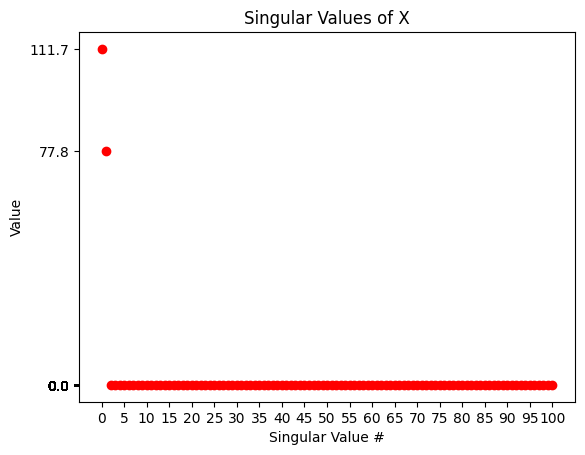

Problem 2a: 

First 10 largest singular values of X = 
 [1.11692688e+02 7.77776698e+01 3.41417291e-14 2.42965954e-14
 1.09397818e-14 1.09397818e-14 1.09397818e-14 1.09397818e-14
 1.09397818e-14 1.09397818e-14]


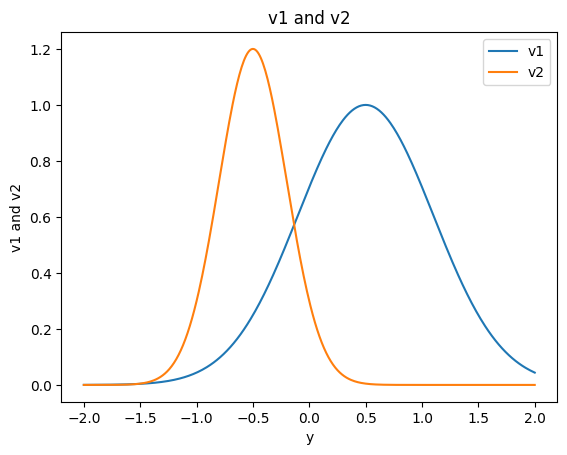

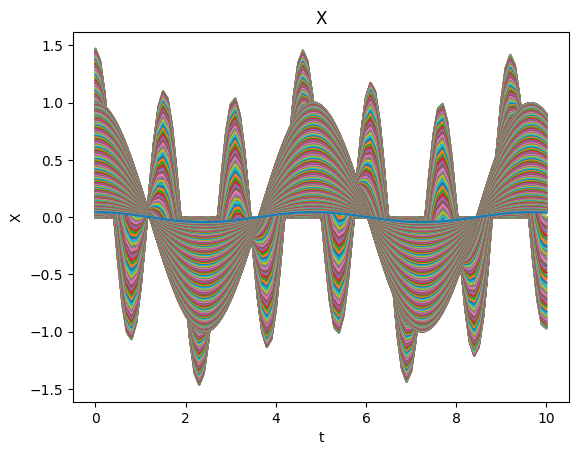

In [198]:
# compute PCA of X
U, S, V = linalg.svd(X, full_matrices=False)

# sort singular values from largest to smallest
S = np.sort(S)[::-1]

# plot singular values and include tick marks on x and y
plt.plot(S, 'ro')
plt.xlabel('Singular Value #')
plt.ylabel('Value')
plt.title('Singular Values of X')
plt.xticks(np.arange(0, 101, 5))
plt.yticks(S)
plt.show()

# print the first 10 largest singular values (in their normal values, no truncation)
print("Problem 2a: \n")
print("First 10 largest singular values of X = \n", S[:10])

# plot v1 and v2
plt.plot(y, v1, label='v1')
plt.plot(y, v2, label='v2')
plt.xlabel('y')
plt.ylabel('v1 and v2')
plt.title('v1 and v2')
plt.legend()
plt.show()

# plot X
plt.plot(t, np.transpose(X), label='X')
plt.xlabel('t')
plt.ylabel('X')
plt.title('X')
plt.show()


## I think that the reason why the first two singular values are so large, is that our data for X seems to be some sort of gaussian distribution, with two different sigmoids overlapping with each other. While both have their own unique value for sigmay, y0, and omega, resulting in different values for v1 and v2 (as can be seen from the plot), it seems that amplitude explains a majority of the overall signal, and directly controls the size/height of the sigmoids that are then used in our calculation of the X matrix. It could be that the other parameters in our function don't contribute a whole ton.


## (b). Plot the “real” part of the first two left singular vectors against y (the spatial coordinate). **Bonus grade**: Do the same plot for the two leading right singular vectors. Note that this time the plot is against time (t). **Important reminder**: U has information about spatial modes, V has information in time (coefficients).

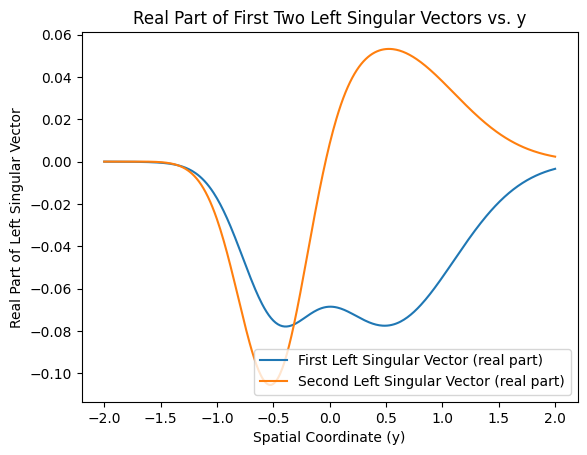

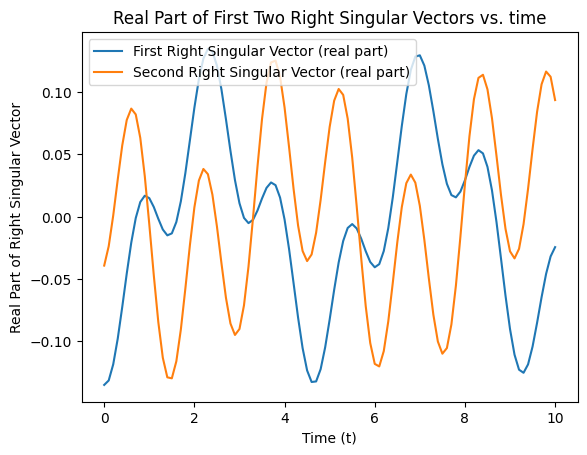

In [199]:
# plot "real" part of first two left singular vectors against y (spatial coordinate)
plt.plot(y, np.real(U[:, 0]), label='First Left Singular Vector (real part)')
plt.plot(y, np.real(U[:, 1]), label='Second Left Singular Vector (real part)')
plt.xlabel('Spatial Coordinate (y)')
plt.ylabel('Real Part of Left Singular Vector')
plt.title('Real Part of First Two Left Singular Vectors vs. y')
plt.legend()
plt.show()

# plot the real part of the two leading right singular vectors against time
plt.plot(t, np.real(V[0, :]), label='First Right Singular Vector (real part)')
plt.plot(t, np.real(V[1, :]), label='Second Right Singular Vector (real part)')
plt.xlabel('Time (t)')
plt.ylabel('Real Part of Right Singular Vector')
plt.title('Real Part of First Two Right Singular Vectors vs. time')
plt.legend()
plt.show()

## (c) Compute the dynamic mode decomposition of X. (That is, find a matrix A that maps each column of X one step forward in time, and compute the eigendecomposition of this matrix A). Plot the real part of eigenvectors of A that correspond to nonzero eigenvalues (against space y).


DMD A Shape:
 (401, 2)
DMD Lambda:
 [[0.00802064+0.0387574j  0.        +0.j        ]
 [0.        +0.j         0.02569358-0.02510475j]]
DMD b:
 [-63.41787414+399.66021667j -26.17230167 +74.65642156j]


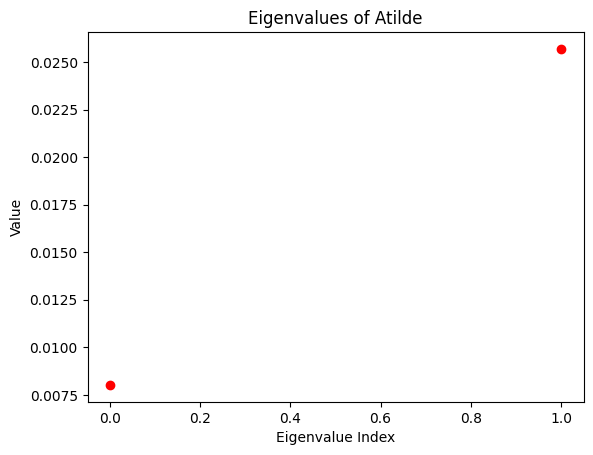

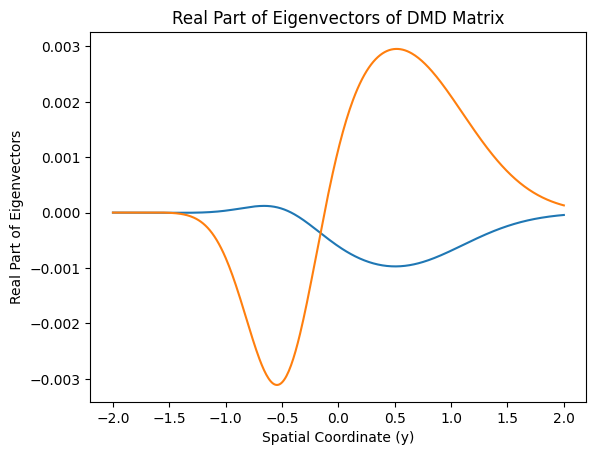

In [200]:
# compute dynamic mode decomp of X (find matrix A that maps columns of X in one step forward in time)

# Construct X1 and X2 matrices
X1 = X[:, :-1]  # All columns except the last one
X2 = X[:, 1:]   # All columns except the first one

# use function from textbook
def DMD(X,Xprime,r):  #The 4 steps defined in DMD algorithm in textbook
    U,Sigma,VT = np.linalg.svd(X,full_matrices=0) # Step 1
    Ur = U[:,:r]
    Sigmar = np.diag(Sigma[:r])
    VTr = VT[:r,:]
    Atilde = np.linalg.solve(Sigmar.T,(Ur.T @ Xprime @ VTr.T).T).T # Step 2
    Lambda, W = np.linalg.eig(Atilde) # Step 3
    Lambda = np.diag(Lambda)

    Phi = Xprime @ np.linalg.solve(Sigmar.T,VTr).T @ W # Step 4
    alpha1 = Sigmar @ VTr[:,0]
    b = np.linalg.solve(W @ Lambda,alpha1)
    return Phi, Lambda, b

A_dmd, Lambda, b = DMD(X1, X2, 2)

# convert returned A_dmd, Lambda, and b into numpy objects
A_dmd = np.array(A_dmd)
Lambda = np.array(Lambda)
b = np.array(b)

# print("DMD Matrix A_dmd shape:\n", A_dmd)
print("DMD A Shape:\n", np.shape(A_dmd))
print("DMD Lambda:\n", Lambda)
print("DMD b:\n", b)

# Plot the eigenvalues (diagonal elements of Lambda)
plt.plot(np.diag(Lambda), 'ro')
plt.xlabel('Eigenvalue Index')
plt.ylabel('Value')
plt.title('Eigenvalues of Atilde')
plt.show()

# get real parts of eigen vectors of A that correspond to a non-zero eigenvalue
non_zero_eigenvalues = np.where(np.abs(np.diag(Lambda)) > 1e-10)[0]
non_zero_eigenvectors = A_dmd[:, non_zero_eigenvalues]

# plot real part of eigenvectors of A that are non-zero
plt.plot(y, np.real(non_zero_eigenvectors), label='Real Part of Eigenvectors')
plt.xlabel('Spatial Coordinate (y)')
plt.ylabel('Real Part of Eigenvectors')
plt.title('Real Part of Eigenvectors of DMD Matrix')
plt.show()


## (d) Change the analytical equation in the code that generated your data such that it is a very different function (don’t just change parameters; define a very different spatiotemporaldata). Repeat either the PCA or DMD above with this new data. Bonus grade: Define your function such that your new results have some interesting conceptual differences with the original results and discuss these differences.


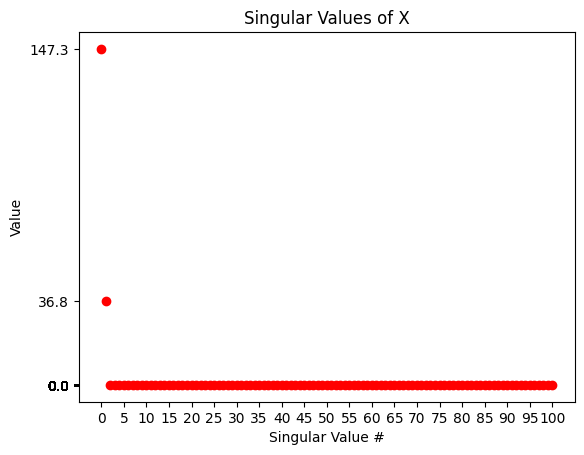

Problem 2d: 

First 10 largest singular values of X = 
 [1.47335566e+02 3.68116334e+01 4.94252497e-14 1.38315248e-14
 1.38315248e-14 1.38315248e-14 1.38315248e-14 1.38315248e-14
 1.38315248e-14 1.38315248e-14]


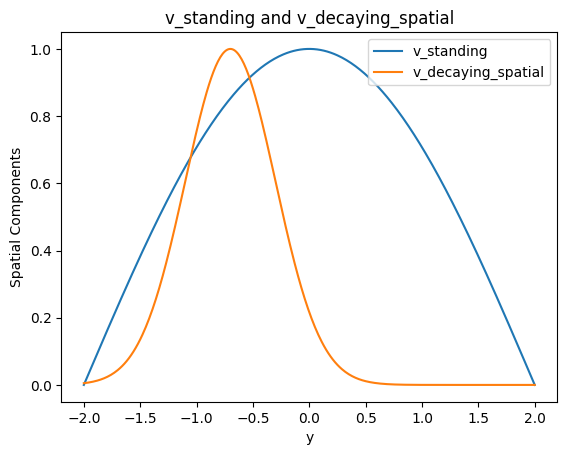

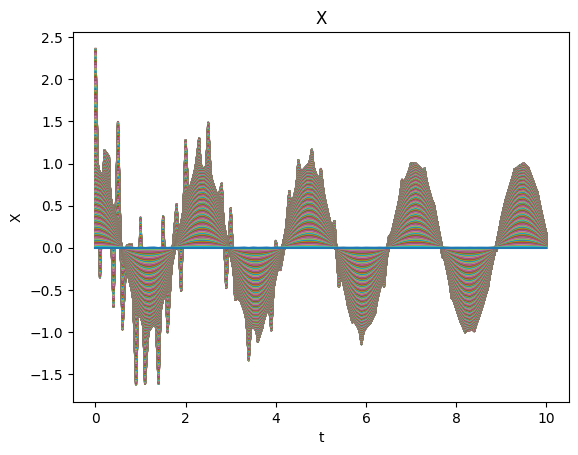

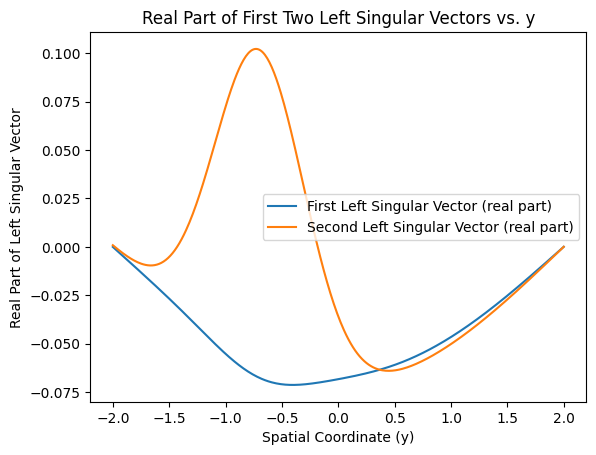

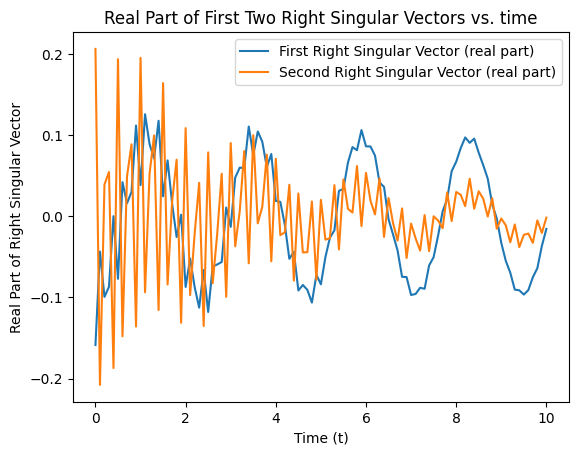

DMD A Shape:
 (401, 2)
DMD Lambda:
 [[ 0.00567814-0.03943228j  0.        +0.j        ]
 [ 0.        +0.j         -0.00187343+0.05100804j]]
DMD b:
 [ 70.66837282-343.21041953j 124.55499723+247.33852221j]


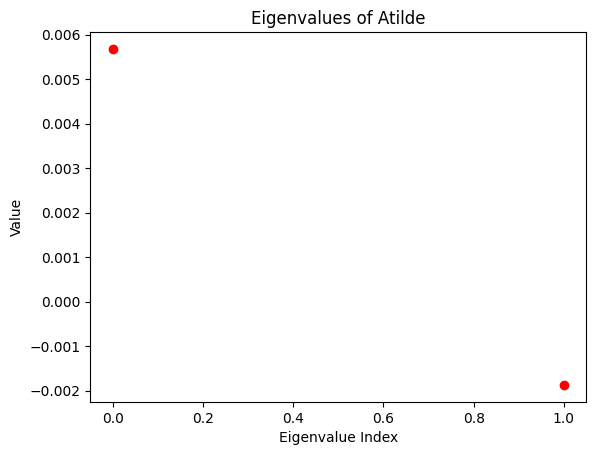

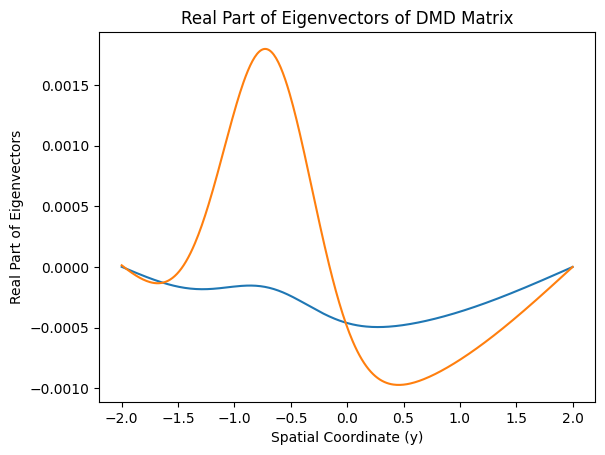

In [201]:
# declare new spatiotemporal data (this part, I used gemini to help construct the
# standing wave and decaying wave, but I helped structure it and gave it the desired
# behavior).
# Component 1: Standing Wave
# Spatial profile (e.g., sine wave across the domain)
L_y = y.max() - y.min()
v_standing = np.sin(np.pi * (y - y.min()) / L_y)
omega_standing = 500 # Frequency for the standing wave
amp_standing = 1.0

# Component 2: Decaying Traveling Wave
# Spatial profile (e.g., a Gaussian, but maybe wider or shifted differently)
y0_decay = -0.7 # Center for decaying wave
sigmay_decay = 0.4 # Width for decaying wave
v_decaying_spatial = np.exp(-((y - y0_decay)**2)/(2*sigmay_decay**2))
omega_traveling = 25 # Frequency for the traveling wave
decay_rate = 0.3 # Exponential decay rate
amp_decaying = 1.5

X = np.zeros([Ny,Nt],dtype=complex)
for tt in range(Nt):
    # Standing wave part
    term1 = amp_standing * v_standing * np.exp(1j*omega_standing*t[tt])
    # Decaying traveling wave part
    term2 = amp_decaying * v_decaying_spatial * np.exp(1j*omega_traveling*t[tt]) * np.exp(-decay_rate * t[tt])
    X[:,tt] = term1 + term2


# compute PCA of X
U, S, V = linalg.svd(X, full_matrices=False)

# sort singular values from largest to smallest
S = np.sort(S)[::-1]

# plot singular values and include tick marks on x and y
plt.plot(S, 'ro')
plt.xlabel('Singular Value #')
plt.ylabel('Value')
plt.title('Singular Values of X')
plt.xticks(np.arange(0, 101, 5))
plt.yticks(S)
plt.show()

# print the first 10 largest singular values (in their normal values, no truncation)
print("Problem 2d: \n")
print("First 10 largest singular values of X = \n", S[:10])

# plot v_standing and v_decaying_spatial
plt.plot(y, v_standing, label='v_standing')
plt.plot(y, v_decaying_spatial, label='v_decaying_spatial')
plt.xlabel('y')
plt.ylabel('Spatial Components')
plt.title('v_standing and v_decaying_spatial')
plt.legend()
plt.show()

# plot X
plt.plot(t, np.transpose(X), label='X')
plt.xlabel('t')
plt.ylabel('X')
plt.title('X')
plt.show()

# plot "real" part of first two left singular vectors against y (spatial coordinate)
plt.plot(y, np.real(U[:, 0]), label='First Left Singular Vector (real part)')
plt.plot(y, np.real(U[:, 1]), label='Second Left Singular Vector (real part)')
plt.xlabel('Spatial Coordinate (y)')
plt.ylabel('Real Part of Left Singular Vector')
plt.title('Real Part of First Two Left Singular Vectors vs. y')
plt.legend()
plt.show()

# plot the real part of the two leading right singular vectors against time
plt.plot(t, np.real(V[0, :]), label='First Right Singular Vector (real part)')
plt.plot(t, np.real(V[1, :]), label='Second Right Singular Vector (real part)')
plt.xlabel('Time (t)')
plt.ylabel('Real Part of Right Singular Vector')
plt.title('Real Part of First Two Right Singular Vectors vs. time')
plt.legend()
plt.show()

# compute dynamic mode decomp of X (find matrix A that maps columns of X in one step forward in time)

# Construct X1 and X2 matrices
X1 = X[:, :-1]  # All columns except the last one
X2 = X[:, 1:]   # All columns except the first one

# use function from textbook
def DMD(X,Xprime,r):  #The 4 steps defined in DMD algorithm in textbook
    U,Sigma,VT = np.linalg.svd(X,full_matrices=0) # Step 1
    Ur = U[:,:r]
    Sigmar = np.diag(Sigma[:r])
    VTr = VT[:r,:]
    Atilde = np.linalg.solve(Sigmar.T,(Ur.T @ Xprime @ VTr.T).T).T # Step 2
    Lambda, W = np.linalg.eig(Atilde) # Step 3
    Lambda = np.diag(Lambda)

    Phi = Xprime @ np.linalg.solve(Sigmar.T,VTr).T @ W # Step 4
    alpha1 = Sigmar @ VTr[:,0]
    b = np.linalg.solve(W @ Lambda,alpha1)
    return Phi, Lambda, b

A_dmd, Lambda, b = DMD(X1, X2, 2)

# convert returned A_dmd, Lambda, and b into numpy objects
A_dmd = np.array(A_dmd)
Lambda = np.array(Lambda)
b = np.array(b)

# print("DMD Matrix A_dmd shape:\n", A_dmd)
print("DMD A Shape:\n", np.shape(A_dmd))
print("DMD Lambda:\n", Lambda)
print("DMD b:\n", b)

# Plot the eigenvalues (diagonal elements of Lambda)
plt.plot(np.diag(Lambda), 'ro')
plt.xlabel('Eigenvalue Index')
plt.ylabel('Value')
plt.title('Eigenvalues of Atilde')
plt.show()

# get real parts of eigen vectors of A that correspond to a non-zero eigenvalue
non_zero_eigenvalues = np.where(np.abs(np.diag(Lambda)) > 1e-10)[0]
non_zero_eigenvectors = A_dmd[:, non_zero_eigenvalues]

# plot real part of eigenvectors of A that are non-zero
plt.plot(y, np.real(non_zero_eigenvectors), label='Real Part of Eigenvectors')
plt.xlabel('Spatial Coordinate (y)')
plt.ylabel('Real Part of Eigenvectors')
plt.title('Real Part of Eigenvectors of DMD Matrix')
plt.show()

## The new dataset (X(y,t)) was constructed as the sum of two distinct spatiotemporal components: (1) a standing wave with a sinusoidal spatial profile that oscillates in time with constant amplitude, and (2) a localized Gaussian-shaped component whose oscillations decay exponentially in time. Because each component is essentially separable into a “spatial shape × time behavior,” the combined matrix is dominated by two underlying modes. This is why the SVD singular value plot shows two large singular values followed by a sharp drop: it indicates that most of the energy/variance in (X) is captured by two principal directions (i.e., the data is approximately rank-2). The left singular vectors (columns of (U)) then reveal the dominant spatial structures: one mode resembles the global sine-wave pattern, while the other resembles the localized Gaussian pulse, unlike the original problem where both dominant spatial patterns were Gaussian-like.

## The right singular vectors (columns of (V), equivalently the rows of (V^H) returned by `svd`) describe how strongly each spatial mode is “activated” over time. In this modified dataset, one temporal mode is purely oscillatory (matching the standing wave’s constant-amplitude behavior), while the other shows oscillations whose amplitude decreases over time (matching the exponential decay). Dynamic Mode Decomposition (DMD) similarly identifies coherent spatial patterns and associates them with eigenvalues that encode growth/decay and oscillation. In this case, DMD modes align with the standing-wave-like and Gaussian-like structures, and their eigenvalues would be expected to reflect the difference in dynamics: a magnitude near 1 for the non-decaying oscillation and a magnitude less than 1 for the decaying component. Overall, the exercise demonstrates that SVD/PCA and DMD can separate and interpret mixed spatiotemporal behavior, capturing both the change in spatial structure (sine vs. Gaussian) and the introduction of decay in time.
